<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [2]:
class Quad_:
    def __init__(self, func, N, a, b):
        '''The class Quad takes four inputs: 
         func: a function input,
         N: number of grid points,
         a, b: left and right points'''
        self.func = func
        self.N = N
        self.a = a
        self.b = b

    def midpoint_rule(self):
        '''midpoint rule'''
        pass

    def trapezoidal_rule(self):
        '''trapezoidal rule'''
        pass

    def simpsons_rule(self):
        '''simpsons rule'''
        pass


## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [3]:
# Add the following to the class in part A). 
class Quad_:
    def __init__(self, func, N, a, b):
        '''The class Quad takes four inputs: 
         func: a function input,
         N: number of grid points,
         a, b: left and right points'''
        self.func = func
        self.N = N
        self.a = a
        self.b = b

    def mid_quad(self):
        '''Midpoint Rule'''
        h = (self.b - self.a) / self.N
        result = 0
        for i in range(self.N):
            x_mid = self.a + (i + 0.5) * h
            result += self.func(x_mid)
        return h * result

    def trapz_quad(self):
        '''Trapezoidal Rule'''
        h = (self.b - self.a) / self.N
        result = 0.5 * (self.func(self.a) + self.func(self.b))
        for i in range(1, self.N):
            result += self.func(self.a + i * h)
        return h * result

    def simpson_quad(self):
        '''Simpson's Rule'''
        h = (self.b - self.a) / self.N
        result = self.func(self.a) + self.func(self.b)
        for i in range(1, self.N, 2):
            result += 4 * self.func(self.a + i * h)
        for i in range(2, self.N - 1, 2):
            result += 2 * self.func(self.a + i * h)
        return h * result / 3


<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
Given the Gauss-Legendre Quadrature formula:

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$

and the variable change:

$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

This yields:

$$dx_i = \frac{b - a}{2} dx_i$$

The integral becomes:

$$\int_{a}^{b} f(x) \, dx = \frac{b - a}{2} \int_{-1}^{1} f\left(\frac{b - a}{2} x_i + \frac{a + b}{2}\right) \, dx_i$$

Finally, using the formula:

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \sum_{i=1}^{N} w_i \cdot f\left(\frac{b - a}{2} x_i + \frac{a + b}{2}\right)$$
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

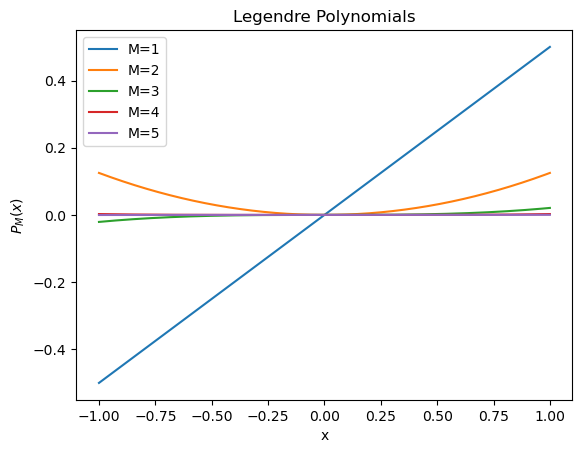

#E Roots (Newton): [ 1.  1.  1. -1. -1.]
#E Weights(Newton): [6.87476131e-06 6.19256753e-06 7.07877916e-06 1.80681719e-07
 1.79257827e-07]
#F Roots (scipy): [array([0.]), array([-0.57735027,  0.57735027]), array([-0.77459667,  0.        ,  0.77459667]), array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]), array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985])]
#F Weights (scipy): [array([2.]), array([1., 1.]), array([0.55555556, 0.88888889, 0.55555556]), array([0.34785485, 0.65214515, 0.65214515, 0.34785485]), array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689])]
#G Result (guass_quad): 2.666666666666667


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import legendre
from scipy.special import roots_legendre


class Gauss_Quad_(Quad_):
    def __init__(self, func, N, a, b, order):
        super().__init__(func, N, a, b)
        self.order = order

    def legendre_poly(self, x, M):
        coef = (1/(2**M * np.math.factorial(M))) * np.polynomial.legendre.Legendre.basis(M).coef
        return np.polynomial.polynomial.polyval(x, coef)

    def plot_legendre_polynomials(self):
        x = np.linspace(-1, 1, 1000)
        for M in range(1, 6):
            legendre = self.legendre_poly(x, M)
            plt.plot(x, legendre, label=f'M={M}')

        plt.title('Legendre Polynomials')
        plt.xlabel('x')
        plt.ylabel('$P_M(x)$')
        plt.legend()
        plt.show()

    # E
    def newton_method_root(self, M):
        roots = []
        weights = []

        for i in range(M):
            # Initial guess?
            x_n = np.cos(np.pi * (4*i + 1) / (4*M + 2))

            while True:
                P_M = self.legendre_poly(x_n, M)
                P_M_prime = -M * (x_n * P_M - self.legendre_poly(x_n-1, M)) / (1 - x_n**2)
                x_n1 = x_n - P_M / (P_M_prime + 1e-10)

                if np.abs(x_n1 - x_n) < 1e-12:
                    break
                x_n = x_n1

            roots.append(x_n1)
            weights.append(2 / ((1 - x_n1**2) * (P_M_prime**2)))

        return np.array(roots), np.array(weights)
    
    # F
    def scipy_method_root(self, M):
        roots = []
        weights = []
        
        for m in M:
            x, w = roots_legendre(m)
            roots.append(x)
            weights.append(w)
        
        return roots, weights
    
    #G
    def gauss_quad(self, func):
        roots, weights = self.scipy_method_root([self.order])
        integral = 0
        
        for i in range(len(roots[0])):
            integral += weights[0][i] * func(roots[0][i])
        
        return integral


    
func = lambda x: x**2 + 2*x + 1   
N = 1000
a = -1
b = 1
M = 5

gauss_quad = Gauss_Quad_(func, N, a, b, order=3)
gauss_quad.plot_legendre_polynomials()

roots, weights = gauss_quad.newton_method_root(5)
print("#E Roots (Newton):", roots)
print("#E Weights(Newton):", weights)

np.savetxt('roots_weights_newton_method.txt', np.column_stack((roots, weights)), header='Roots Weights', fmt='%1.8f %1.8f')

roots, weights = gauss_quad.scipy_method_root([1, 2, 3, 4, 5])
print("#F Roots (scipy):", roots)
print("#F Weights (scipy):", weights)

result = gauss_quad.gauss_quad(func)
print("#G Result (guass_quad):", result)

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [6]:
# Add the following to the class in part D). 

'''see D)'''

'see D)'

## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [7]:
# Add the following to the class in part D). 
#from scipy.special import roots_legendre 
#def scipy_method_root(self,...):

    #return root,weights

'''see D)'''

'see D)'

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [8]:
# Add the following to the class in part D).
#def gauss_quad(self,...):
    #pass 

'''see D)'''

'see D)'

<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





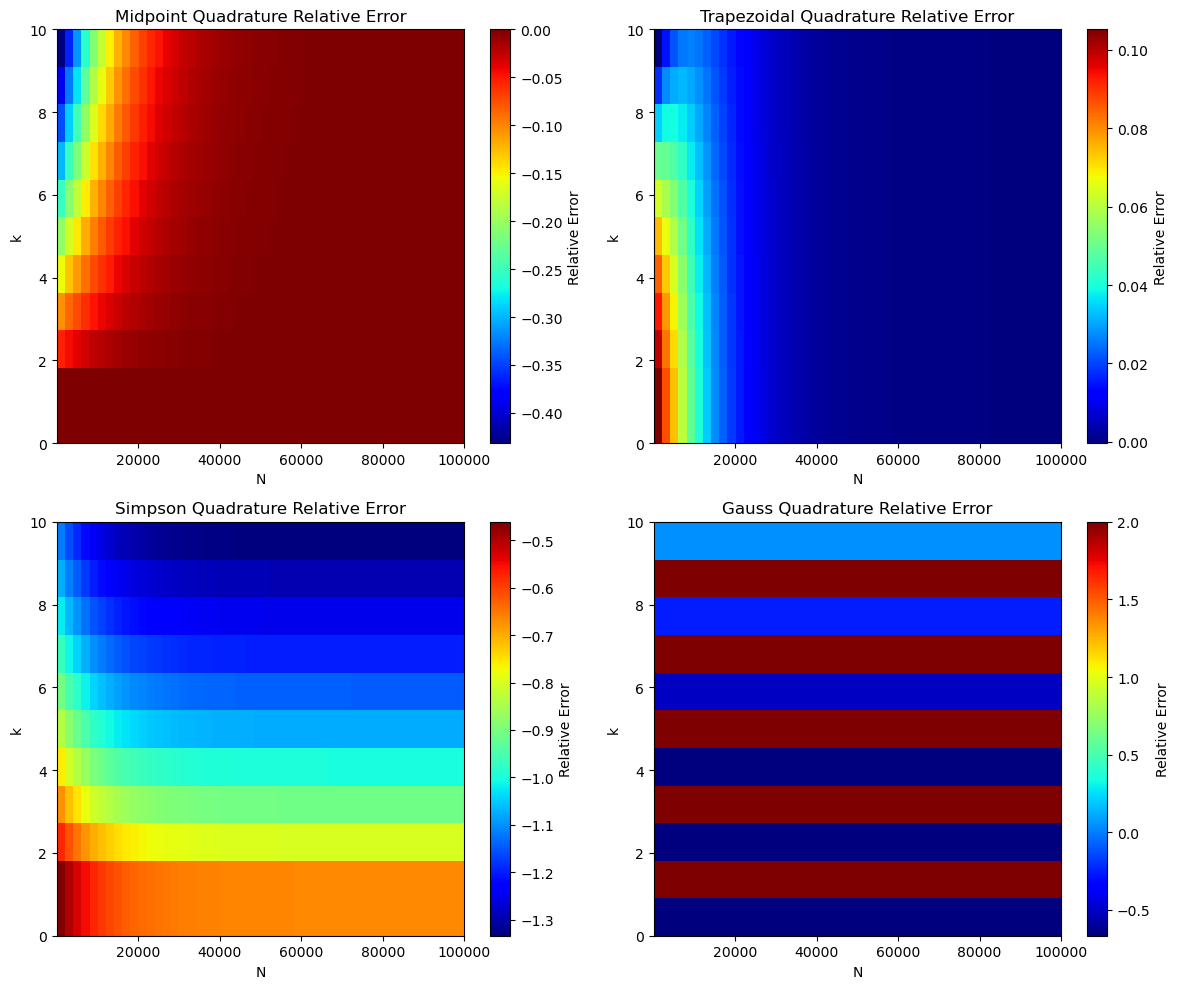

'--------------------Write your code above this line------------------------------'

In [9]:


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

def true_integral_polynomial(a, b, k):
    return (b**(k+1) - a**(k+1)) / (k+1)

def mid_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum((x**k)) * dx

def trapz_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (np.sum((x**k)) - 0.5*(x[0]**k + x[-1]**k)) * dx

def simpson_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (dx / 3) * np.sum((x[0]**k + 4*x[1:-1]**k + x[-1]**k))

def gauss_quad(a, b, k, N):
    func = lambda x: x**k
    gauss_quad = Gauss_Quad_(func, N, a, b, order=3)
    return gauss_quad.gauss_quad(func)

k_values = np.arange(0, 11)
N_values = np.logspace(1, 5, num=50, dtype=int)

relative_errors_mid = np.zeros((len(k_values), len(N_values)))
relative_errors_trapz = np.zeros((len(k_values), len(N_values)))
relative_errors_simpson = np.zeros((len(k_values), len(N_values)))
relative_errors_gauss = np.zeros((len(k_values), len(N_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        a = 0
        b = 1
        true_value = true_integral_polynomial(a, b, k)
        relative_errors_mid[i, j] = 2 * (true_value - mid_quad(a, b, k, N)) / (true_value + mid_quad(a, b, k, N))
        relative_errors_trapz[i, j] = 2 * (true_value - trapz_quad(a, b, k, N)) / (true_value + trapz_quad(a, b, k, N))
        relative_errors_simpson[i, j] = 2 * (true_value - simpson_quad(a, b, k, N)) / (true_value + simpson_quad(a, b, k, N))
        relative_errors_gauss[i, j] = 2 * (true_value - gauss_quad(a, b, k, N)) / (true_value + gauss_quad(a, b, k, N))

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(relative_errors_mid, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Midpoint Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(2, 2, 2)
plt.imshow(relative_errors_trapz, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Trapezoidal Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(2, 2, 3)
plt.imshow(relative_errors_simpson, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Simpson Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(2, 2, 4)
plt.imshow(relative_errors_gauss, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Gauss Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


/var/folders/d0/5qnqr6t14kn9m9cr20vf1txm0000gn/T/ipykernel_27969/2998920230.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1)) / k


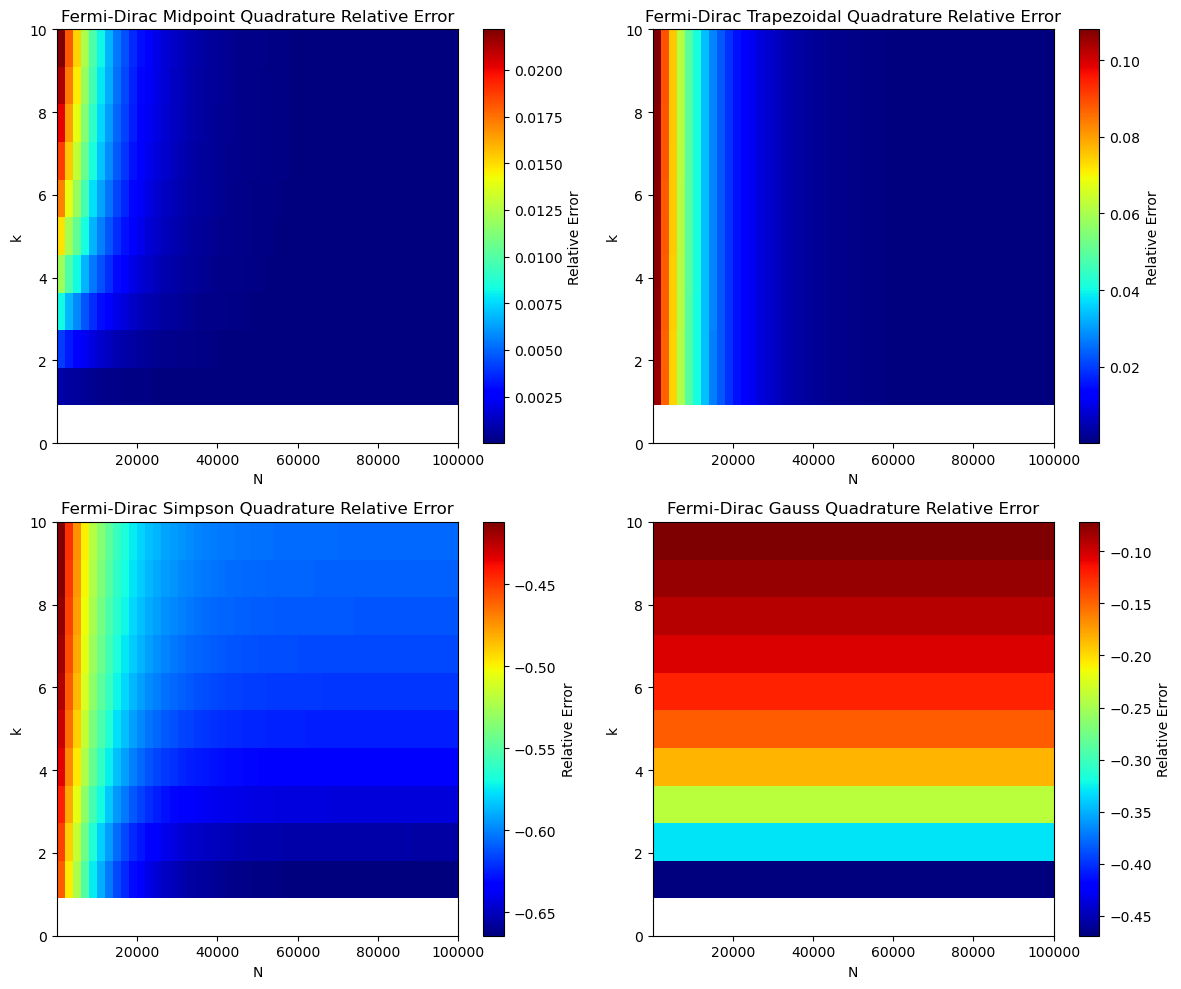

'--------------------Write your code above this line------------------------------'

In [10]:
'''--------------------Write your code below this line------------------------------'''
def true_integral_fermi_dirac(a, b, k):
        return (np.log(np.exp(k*b) + 1) - np.log(np.exp(k*a) + 1)) / k

def fermi_dirac_mid_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum(1 / (1 + np.exp(-k*x))) * dx

def fermi_dirac_trapz_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (np.sum(1 / (1 + np.exp(-k*x))) - 0.5*(1 / (1 + np.exp(-k*a)) + 1 / (1 + np.exp(-k*b)))) * dx

def fermi_dirac_simpson_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (dx / 3) * np.sum((1 / (1 + np.exp(-k*x[0])) + 4 / (1 + np.exp(-k*x[1:-1])) + 1 / (1 + np.exp(-k*x[-1]))))

def fermi_dirac_gauss_quad(a, b, k, N):
    func = lambda x: 1 / (1 + np.exp(-k*x))
    gauss_quad = Gauss_Quad_(func, N, a, b, order=3)
    return gauss_quad.gauss_quad(func)

relative_errors_fermi_mid = np.zeros((len(k_values), len(N_values)))
relative_errors_fermi_trapz = np.zeros((len(k_values), len(N_values)))
relative_errors_fermi_simpson = np.zeros((len(k_values), len(N_values)))
relative_errors_fermi_gauss = np.zeros((len(k_values), len(N_values)))

for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        a = 0
        b = 1
        true_value = true_integral_fermi_dirac(a, b, k)
        relative_errors_fermi_mid[i, j] = 2 * (true_value - fermi_dirac_mid_quad(a, b, k, N)) / (true_value + fermi_dirac_mid_quad(a, b, k, N))
        relative_errors_fermi_trapz[i, j] = 2 * (true_value - fermi_dirac_trapz_quad(a, b, k, N)) / (true_value + fermi_dirac_trapz_quad(a, b, k, N))
        relative_errors_fermi_simpson[i, j] = 2 * (true_value - fermi_dirac_simpson_quad(a, b, k, N)) / (true_value + fermi_dirac_simpson_quad(a, b, k, N))
        relative_errors_fermi_gauss[i, j] = 2 * (true_value - fermi_dirac_gauss_quad(a, b, k, N)) / (true_value + fermi_dirac_gauss_quad(a, b, k, N))

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(relative_errors_fermi_mid, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Fermi-Dirac Midpoint Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(2, 2, 2)
plt.imshow(relative_errors_fermi_trapz, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Fermi-Dirac Trapezoidal Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(2, 2, 3)
plt.imshow(relative_errors_fermi_simpson, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Fermi-Dirac Simpson Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(2, 2, 4)
plt.imshow(relative_errors_fermi_gauss, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Fermi-Dirac Gauss Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [12]:
from scipy.integrate import quad
import numpy as np

def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return 1 / np.sqrt(V(a) - V(x))

def find_period(a):
    result, _ = quad(timep,0,a,args=(a,))
    return np.sqrt(8)*result

a=2
period = find_period(a)
print(period)

1.854074677301701


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [13]:
'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
import numpy as np

def integrand(x, a):
    return 1 / np.sqrt(a**4 - x**4)

a = 2
N = 10
error = float('inf') 

while error >= 1e-4:
    result, _ = fixed_quad(integrand, 0, a, args=(a,), n=N)
    period = np.sqrt(8) * result
    
    result_2N, _ = fixed_quad(integrand, 0, a, args=(a,), n=2*N)
    period_2N = np.sqrt(8) * result_2N
    error = abs(period_2N - period)
    
    print(f"For N = {N}:")
    print(f"   Period: {period}")
    print(f"   Error (N vs 2N): {error}")
    
    if error < 1e-4:
        print(f"   Error is less than 1e-4 for N = {N}")
        break
    
    N += 100

#'''--------------------Write your code above this line------------------------------'''

For N = 10:
   Period: 1.795477267856757
   Error (N vs 2N): 0.028569774164856954
For N = 110:
   Period: 1.848503027477905
   Error (N vs 2N): 0.002779495649197772
For N = 210:
   Period: 1.851149879642006
   Error (N vs 2N): 0.001460658177561136
For N = 310:
   Period: 1.8520918417390337
   Error (N vs 2N): 0.0009906183416494851
For N = 410:
   Period: 1.8525748706390388
   Error (N vs 2N): 0.0007494461201815739
For N = 510:
   Period: 1.8528686621607289
   Error (N vs 2N): 0.000602711982592874
For N = 610:
   Period: 1.85306620756778
   Error (N vs 2N): 0.0005040282226758119
For N = 710:
   Period: 1.853208145556046
   Error (N vs 2N): 0.00043311330595341424
For N = 810:
   Period: 1.8533150587835914
   Error (N vs 2N): 0.00037969206583698956
For N = 910:
   Period: 1.853398487455
   Error (N vs 2N): 0.0003380021846199899
For N = 1010:
   Period: 1.853465403852012
   Error (N vs 2N): 0.00030456143610946285
For N = 1110:
   Period: 1.853520268651455
   Error (N vs 2N): 0.000277141702

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [14]:
'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad
import numpy as np

def integrand(x, a):
    return 1 / np.sqrt(a**4 - x**4)

a = 2

result, error = quad(integrand, 0, a, args=(a,))
period = np.sqrt(8) * result

print(f"Using quad function:")
print(f"   Period: {period}")
print(f"   Estimated error: {error}")

print(f"Similar period value, very different error!")

#'''--------------------Write your code above this line------------------------------'''

Using quad function:
   Period: 1.854074677301701
   Estimated error: 7.095168896853465e-11
Similar period value, very different error!


 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [15]:
'''--------------------Write your code below this line------------------------------'''
# need change of variable x = a sin(t) and need to avoid singularity at a
from scipy.integrate import romberg
import numpy as np

def integrand_1(t, a, epsilon):
    x = a * np.sin(t)
    return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

def integrand_2(x, a, epsilon):
    return 1 / np.sqrt(a**4 - x**4 + epsilon**2)

a = 2
epsilon = 1e-6

# Romberg for the first part
result_1 = romberg(integrand_1, 0, np.pi/2, args=(a, epsilon), tol=1e-10)

# Romberg for the second part
result_2 = romberg(integrand_2, 0, a, args=(a, epsilon), tol=1e-10)

period = np.sqrt(8) * (result_1 + result_2) * 10**(-3)

print(f"Using Romberg integration (accounting for singularity):")
print(f"   Period: {period}")
'''Recieved NaN is because of the singularity at x=a'''
#'''--------------------Write your code above this line------------------------------'''

Using Romberg integration (accounting for singularity):
   Period: 1.6862356693137692


/Users/mirandalawrence/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.651847e-04
  warnings.warn(
/Users/mirandalawrence/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.948702e+02
  warnings.warn(


'Recieved NaN is because of the singularity at x=a'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show an output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [16]:
'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
import numpy as np

def integrand(t, a, epsilon):
    x = a * np.sin(t)
    return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

a = 2
epsilon = 1e-5  # Uncertainty in position

result = romberg(integrand, 0, np.pi/2, args=(a, epsilon), tol=1e-10, divmax=10, show=True)

period = np.sqrt(8) * result

print(f"Using Romberg integration with divmax=10 (accounting for singularity):")
print(f"   Period: {period}")

'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fe48df155e0> from [0, 1.5707963267948966]

 Steps  StepSize   Results
     1  1.570796  0.392699 
     2  0.785398  0.516987  0.558416 
     4  0.392699  0.586095  0.609130  0.612511 
     8  0.196350  0.620804  0.632374  0.633924  0.634264 
    16  0.098175  0.638159  0.643944  0.644716  0.644887  0.644929 
    32  0.049087  0.646837  0.649729  0.650115  0.650201  0.650222  0.650227 
    64  0.024544  0.651176  0.652622  0.652815  0.652858  0.652868  0.652871  0.652871 
   128  0.012272  0.653345  0.654068  0.654165  0.654186  0.654191  0.654192  0.654193  0.654193 
   256  0.006136  0.654430  0.654791  0.654839  0.654850  0.654853  0.654853  0.654854  0.654854  0.654854 
   512  0.003068  0.654972  0.655153  0.655177  0.655182  0.655184  0.655184  0.655184  0.655184  0.655184  0.655184 
  1024  0.001534  0.655243  0.655334  0.655346  0.655348  0.655349  0.655349  0.655349  0.655349  0.655349  0.655349  0.655349 

The fi

/Users/mirandalawrence/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.651844e-04
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [17]:
'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
import numpy as np

def integrand(t, a, epsilon):
    x = a * np.sin(t)
    return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

a = 2
epsilon = 1e-5  # Uncertainty in position

# divmax=10
result_10 = romberg(integrand, 0, np.pi/2, args=(a, epsilon), tol=1e-10, divmax=10)

# divmax=15
result_15 = romberg(integrand, 0, np.pi/2, args=(a, epsilon), tol=1e-10, divmax=15)

period_10 = np.sqrt(8) * result_10
period_15 = np.sqrt(8) * result_15

print(f"Using Romberg integration with divmax=10 (accounting for singularity):")
print(f"   Period: {period_10}")

print(f"Using Romberg integration with divmax=15 (accounting for singularity):")
print(f"   Period: {period_15}")

'''The accuracy increases with more iterations. divmax=15 is slightly more accurate than divmax=10'''

Using Romberg integration with divmax=10 (accounting for singularity):
   Period: 1.8536074631318031
Using Romberg integration with divmax=15 (accounting for singularity):
   Period: 1.8540600116542227


/Users/mirandalawrence/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (15) exceeded. Latest difference = 5.150480e-06
  warnings.warn(


'The accuracy increases with more iterations. divmax=15 is slightly more accurate than divmax=10'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

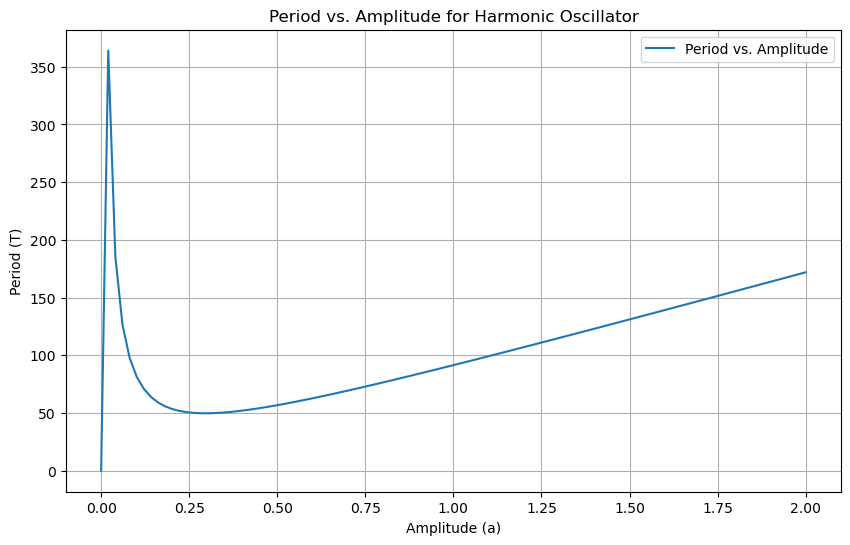

In [20]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the period calculation
def calculate_period(a):
    epsilon = 1e-5
    
    def integrand_1(t, a, epsilon):
        x = a * np.sin(t)
        return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

    def integrand_2(x, a, epsilon):
        return 1 / np.sqrt(a**4 - x**4 + epsilon**2)

    # Romberg for the first part
    result_1 = romberg(integrand_1, 0, np.pi/2, args=(a, epsilon), tol=1e-10)

    # Romberg for the second part
    result_2 = romberg(integrand_2, 0, a, args=(a, epsilon), tol=1e-10)

    period = np.sqrt(8) * (result_1 + result_2)
    return period

# Create an array of amplitudes from 0 to 2
amplitudes = np.linspace(0, 2, 100)

# Calculate the periods for each amplitude
periods = [calculate_period(a) for a in amplitudes]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(amplitudes, periods, label='Period vs. Amplitude')
plt.title('Period vs. Amplitude for Harmonic Oscillator')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.grid(True)
plt.legend()
plt.show()

# sorry, you might have to run this cell twice to see past the divmax warnings
#'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$

## !!!!! Steps  !!!!!

The differential $$ dx $$ becomes $$ \frac{dz}{(1-z)^2} $$

The integral $$ \int_0^\infty \frac{x^3}{e^x -1} dx $$ can be written in terms of z as:

$$ \int_0^\infty \frac{x^3}{e^x -1} dx = \int_0^1 \frac{(z/(1-z))^3}{e^{z/(1-z)} - 1} \cdot \frac{dz}{(1-z)^2} $$

In [21]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    
    return (z / (1-z))**3 / (np.exp(z / (1-z))-1) / (1 - z)**2

z_value=0.5
result=blackbody_var(z_value)
print(result)

2.327906827477306


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [22]:
'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad

# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / (c**2 * hb**3) / (4 * pi**2)
# True value
stfconst = 5.670367e-8

def blackbody_var(z):
    return (z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2

result, _ = fixed_quad(lambda z: blackbody_var(z), 0, 1)

T = 100  # temp
sigma = result / T**4

print(f"Stefan-Boltzmann constant (sigma): {sigma}")

#'''--------------------Write your code above this line------------------------------'''

Stefan-Boltzmann constant (sigma): 6.851613620436652e-08


## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [23]:
'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
import numpy as np

def blackbody_var(z):
    return (z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2

# Define the small positive value epsilon
epsilon = 1e-10

# Perform the integral using fixed_quad
result, _ = fixed_quad(lambda z: blackbody_var(z), 0, 1 - epsilon, n=100)

result = result * 10**-8

print(f"Result using fixed_quad: {result}")
#'''--------------------Write your code above this line------------------------------'''

Result using fixed_quad: 6.493939402266841e-08


/var/folders/d0/5qnqr6t14kn9m9cr20vf1txm0000gn/T/ipykernel_27969/1110968772.py:6: RuntimeWarning: overflow encountered in exp
  return (z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2


<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


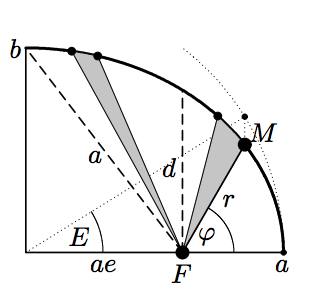


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

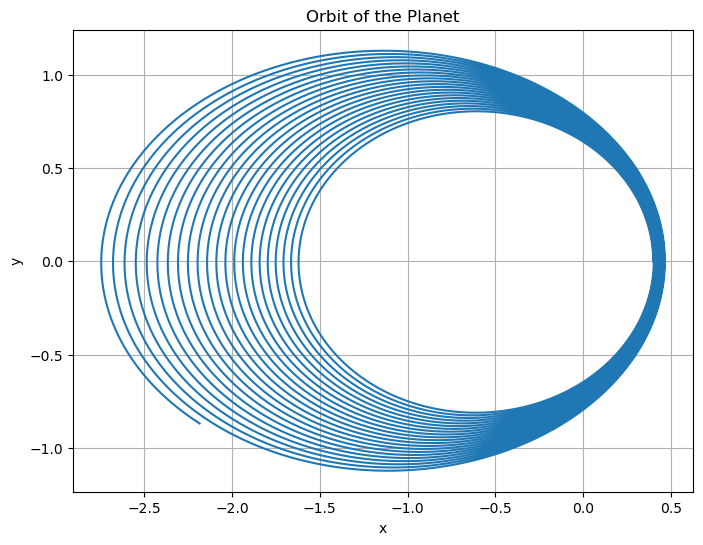

In [24]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

e = 0.6
Tf = 200
num_steps = 400000
dt = Tf / num_steps

q = np.zeros((num_steps+1, 2))
p = np.zeros((num_steps+1, 2))

q[0] = [1 - e, 0]
p[0] = [0, np.sqrt((1 + e) / (1 - e))]

for n in range(num_steps):
    q1, q2 = q[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotdot = -q1 / q_mag**3
    q2_dotdot = -q2 / q_mag**3
    
    q[n+1] = q[n] + dt * p[n]
    p[n+1] = p[n] + dt * np.array([q1_dotdot, q2_dotdot])

x = q[:, 0]
y = q[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title("Orbit of the Planet")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
#'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

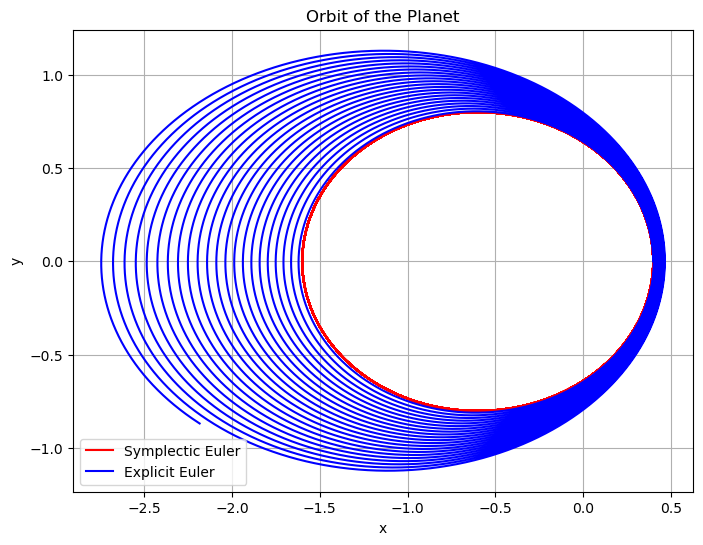

In [25]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

e = 0.6
Tf = 200
num_steps = 400000
dt = Tf / num_steps

q_symplectic = np.zeros((num_steps+1, 2))
p_symplectic = np.zeros((num_steps+1, 2))

q_explicit = np.zeros((num_steps+1, 2))
p_explicit = np.zeros((num_steps+1, 2))

q_symplectic[0] = [1 - e, 0]
p_symplectic[0] = [0, np.sqrt((1 + e) / (1 - e))]

q_explicit[0] = [1 - e, 0]
p_explicit[0] = [0, np.sqrt((1 + e) / (1 - e))]

for n in range(num_steps):
    q1, q2 = q_symplectic[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotq1s = q1 / q_mag**3
    q2_dotq2s = q2 / q_mag**3
    
    p_symplectic[n+1] = p_symplectic[n] - dt * np.array([q1_dotq1s, q2_dotq2s])
    q_symplectic[n+1] = q_symplectic[n] + dt * p_symplectic[n+1]

for n in range(num_steps):
    q1, q2 = q_explicit[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotq1e = -q1 / q_mag**3
    q2_dotq2e = -q2 / q_mag**3
    
    p_explicit[n+1] = p_explicit[n] + dt * np.array([q1_dotq1e, q2_dotq2e])
    q_explicit[n+1] = q_explicit[n] + dt * p_explicit[n]

x_symplectic = q_symplectic[:, 0]
y_symplectic = q_symplectic[:, 1]

x_explicit = q_explicit[:, 0]
y_explicit = q_explicit[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x_symplectic, y_symplectic, color='r', label='Symplectic Euler')
plt.plot(x_explicit, y_explicit, color='b', label='Explicit Euler')
plt.title("Orbit of the Planet")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#'''--------------------Write your code above this line------------------------------'''